In [3]:
pip install pmdarima


The following command must be run outside of the IPython shell:

    $ pip install pmdarima

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [2]:
!pip install pmdarima


  Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\adiwa\\AppData\\Local\\Temp\\pip-uninstall-n0f1owll\\users\\adiwa\\anaconda3\\lib\\site-packages\\numpy\\.libs\\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [4]:
!pip install pmdarima --user

  Using cached https://files.pythonhosted.org/packages/29/7d/869a72d01c073bda028b851991a6ea08277e2eee9af6ab6423f9852e40fa/pmdarima-1.8.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/55/85/70c6602b078bd9e6f3da4f467047e906525c355a4dacd4f71b97a35d9897/joblib-1.0.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/45/42/fc32b88f0dd6e9dad2850766b7a35024ee5df6a99c5f0836f9d5455d1fde/scipy-1.7.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/33/ac/98a9c3f4b6e810c45196f6e15e04f9d83fe3d6000eebbb74dfd084446432/scikit_learn-0.24.2-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/6c/c2/af416a82fd7f051a5a0eae3abeb0a098baa774c306631a5762b1e011d279/statsmodels-0.12.2-cp37-none-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl


In [317]:
import pandas as pd
import numpy as np

In [318]:
import yfinance as yf

In [319]:
ticker=["INFY"]
df = yf.download(ticker,start= "2020-07-01")

[*********************100%***********************]  1 of 1 completed


In [320]:
df.head

<bound method NDFrame.head of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-06-30   9.560000   9.700000   9.520000   9.660000   9.458116  10269600
2020-07-01   9.560000   9.730000   9.530000   9.680000   9.477698  12302500
2020-07-02  10.000000  10.040000   9.890000   9.920000   9.712683  12533400
2020-07-06  10.160000  10.230000  10.070000  10.110000   9.898711   8629600
2020-07-07  10.330000  10.400000  10.220000  10.240000  10.025994  17172600
...               ...        ...        ...        ...        ...       ...
2021-06-29  21.309999  21.500000  21.219999  21.450001  21.450001   4748600
2021-06-30  21.410000  21.430000  21.170000  21.190001  21.190001   6493500
2021-07-01  21.180000  21.240000  20.840000  20.959999  20.959999   4670600
2021-07-02  21.100000  21.150000  21.020000  21.070000  21.070000   4908600
2021-07-06  21.030001  21.110001  20.980000  21.110001  21

In [321]:
df["Adj Close"].head
df.dropna()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,9.560000,9.700000,9.520000,9.660000,9.458116,10269600
2020-07-01,9.560000,9.730000,9.530000,9.680000,9.477698,12302500
2020-07-02,10.000000,10.040000,9.890000,9.920000,9.712683,12533400
2020-07-06,10.160000,10.230000,10.070000,10.110000,9.898711,8629600
2020-07-07,10.330000,10.400000,10.220000,10.240000,10.025994,17172600
...,...,...,...,...,...,...
2021-06-29,21.309999,21.500000,21.219999,21.450001,21.450001,4748600
2021-06-30,21.410000,21.430000,21.170000,21.190001,21.190001,6493500
2021-07-01,21.180000,21.240000,20.840000,20.959999,20.959999,4670600


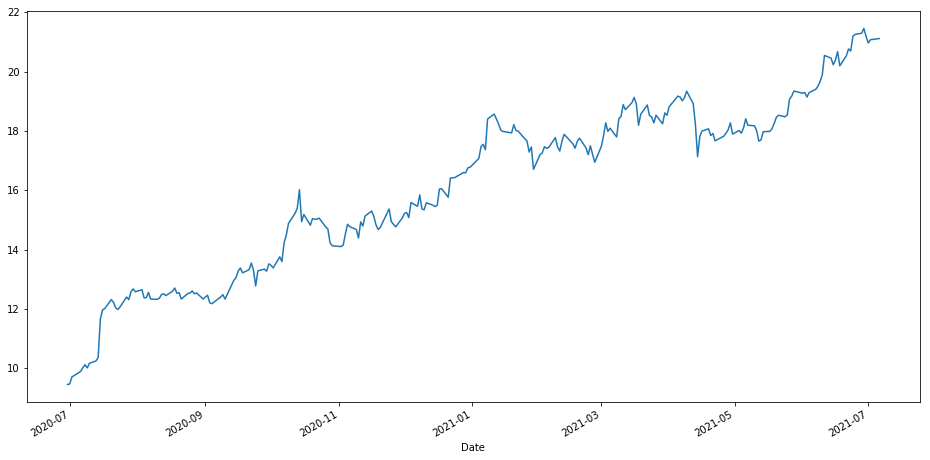

In [322]:
df["Adj Close"].plot(figsize=(16,8))

In [323]:
from statsmodels.tsa.stattools import adfuller

In [313]:
#to Comment on stationarity of graph we need to perform ADFULLER test
#creating a function which runs ADFUller test on dataset
#adfuller test will return array of different values: ADF,p-value, number of lags etc
def ADF(dataset):
    ADFtest= adfuller(dataset, autolag='AIC')
    print("ADF value",ADFtest[0])
    print("p value",ADFtest[1])
    print("number of lags", ADFtest[2])
    print("number of obesrvations", ADFtest[3])
    
#p-value is most important...the less the value themore graph is stationary: ideally it should beless than 0.05

In [314]:
ADF(df["Adj Close"])

ADF value -1.5299533997398442
p value 0.5186452340423913
number of lags 1
number of obesrvations 254


In [324]:
df["Adj Close"]= np.log(df["Adj Close"])

In [325]:
from pmdarima import auto_arima

In [326]:
import warnings
warnings.filterwarnings("ignore")

In [327]:
x=len(df)
x=x-15
train=df['Adj Close'][:x]
test=df['Adj Close'][x:]
x

241

In [328]:
findbest= auto_arima(train,trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1211.884, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1218.647, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1217.268, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1217.254, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1213.842, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1215.340, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.631 seconds


In [329]:
findbest.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  241
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 611.323
Date:                Wed, 07 Jul 2021   AIC                          -1218.647
Time:                        10:36:34   BIC                          -1211.685
Sample:                             0   HQIC                         -1215.842
                                - 241                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0032      0.001      2.570      0.010       0.001       0.006
sigma2         0.0004   1.69e-05     21.210      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               354.02
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.58
Prob(H) (two-sided):                  0.02   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [330]:
from statsmodels.tsa.arima_model import ARIMA

In [331]:
train.shape,test.shape

((241,), (15,))

In [332]:
model = ARIMA(train,order=(0,1,0))
model=model.fit()

In [333]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                  240
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 611.323
Method:                           css   S.D. of innovations              0.019
Date:                Wed, 07 Jul 2021   AIC                          -1218.647
Time:                        10:36:43   BIC                          -1211.685
Sample:                             1   HQIC                         -1215.842
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      2.627      0.009       0.001       0.006
==============================================================================
"""

In [343]:
pred=model.predict(start=len(train),end=(len(train)+len(test)-1),typ='levels')

In [344]:
pred.index=test.index

In [336]:
pred

Date
2021-06-15    3.021196
2021-06-16    3.024409
2021-06-17    3.027622
2021-06-18    3.030835
2021-06-21    3.034048
2021-06-22    3.037261
2021-06-23    3.040474
2021-06-24    3.043687
2021-06-25    3.046900
2021-06-28    3.050112
2021-06-29    3.053325
2021-06-30    3.056538
2021-07-01    3.059751
2021-07-02    3.062964
2021-07-06    3.066177
dtype: float64

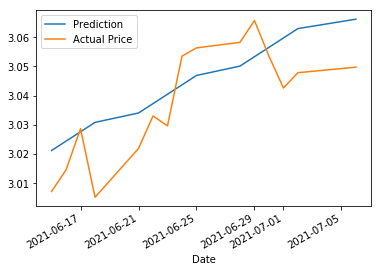

In [337]:
pred.plot(legend=True,label='Prediction')
test.plot(legend=True,label='Actual Price')

In [338]:
from sklearn.metrics import mean_squared_error
from math import sqrt


In [339]:
rmse=sqrt(mean_squared_error(pred,test))


In [340]:
rmse

0.012761748375146277